1) Предположим, что заказчик решил посмотреть динамику цен на авокадо в США. Имеется следующий набор данных от Hass Avocado Board 🥑:  
  
Date — дата  
AveragePrice — средняя цена одного авокадо  
Total Volume — количество проданных авокадо  
4046 — количество проданных авокадо PLU* 4046  
4225 — количество проданных авокадо PLU 4225  
4770 — количество проданных авокадо PLU 4770  
Total Bags — всего упаковок  
Small Bags — маленькие упаковки  
Large Bags — большие  
XLarge Bags — очень большие  
type — обычный или органический  
year — год  
Region — город или регион the city or region of the observation  
*PLU — код товара (Product Lookup code)  

*В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений,   отличающихся по типу авокадо и региону продажи.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as px
import os
%matplotlib inline

In [14]:
path = r'C:\Users\user\Desktop\Данные\avocado_mean.csv'

In [15]:
avocado_mean = pd.read_csv(path,  
                           index_col=0, squeeze=True, parse_dates=['Date'])

In [16]:
avocado_mean

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64

# Посчитаем скользящее среднее цены авокадо с окном равным 3.   

In [17]:
AveragePrice = avocado_mean.rolling(3).mean()
AveragePrice

Date
2015-01-04         NaN
2015-01-11         NaN
2015-01-18    1.354352
2015-01-25    1.386296
2015-02-01    1.345093
                ...   
2018-02-25    1.346914
2018-03-04    1.361296
2018-03-11    1.348302
2018-03-18    1.332994
2018-03-25    1.331883
Name: AveragePrice, Length: 169, dtype: float64

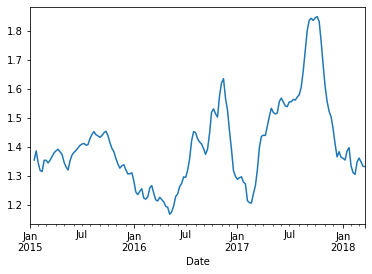

In [18]:
AveragePrice.plot();

In [19]:
print('Максимальное значение скользящего среднего равно {}.'.format(round(AveragePrice.max(),2)))

Максимальное значение скользящего среднего равно 1.85.


# Отлично!   
Самое время посмотреть, как изменится график в зависимости от выбранного размера окна.  
Задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50) и посмотреть на изменения

In [25]:
avocado_mean.rolling(2).mean()

Date
2015-01-04         NaN
2015-01-11    1.335972
2015-01-18    1.380880
2015-01-25    1.394120
2015-02-01    1.322083
                ...   
2018-02-25    1.366852
2018-03-04    1.354907
2018-03-11    1.342639
2018-03-18    1.324398
2018-03-25    1.330278
Name: AveragePrice, Length: 169, dtype: float64

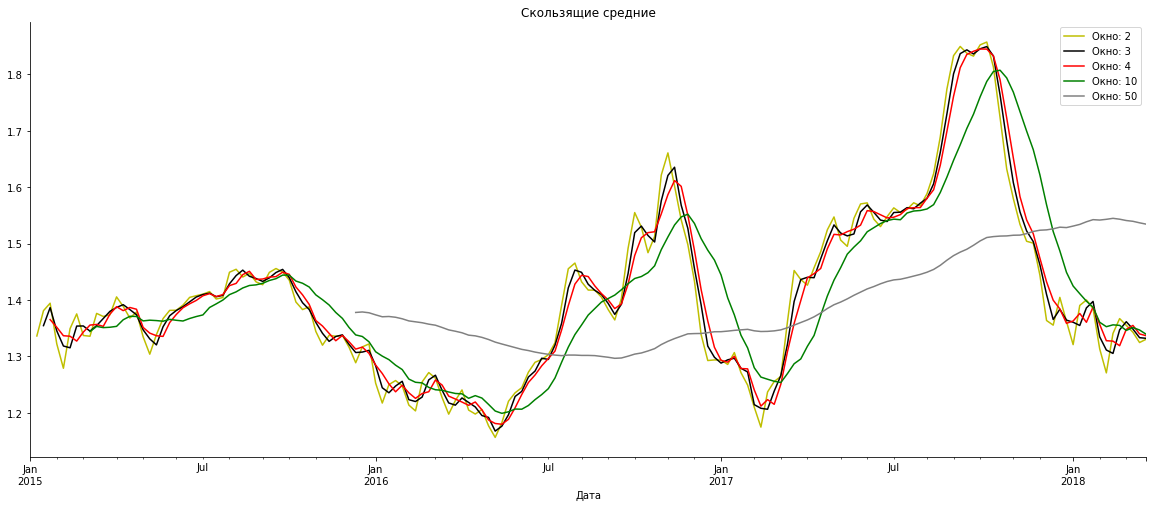

In [26]:
plt.figure()
ax=avocado_mean.rolling(2).mean().plot(color='y',figsize=(20,8))
ax=avocado_mean.rolling(3).mean().plot(color='k')
ax=avocado_mean.rolling(4).mean().plot(color='r')
ax=avocado_mean.rolling(10).mean().plot(color='g')
ax=avocado_mean.rolling(50).mean().plot(color='grey')
ax.legend(['Окно: 2','Окно: 3','Окно: 4','Окно: 10','Окно: 50'])
plt.title('Скользящие средние')
plt.xlabel('Дата')
sns.despine()

# Используем агрегированные данные о ценах на авокадо и применим функцию посчитаем экспоненциальное скользящее среднее.

In [93]:
avocado_ewm = avocado_mean.ewm(span=2).mean()
avocado_ewm

Date
2015-01-04    1.301296
2015-01-11    1.353310
2015-01-18    1.379480
2015-01-25    1.391394
2015-02-01    1.294758
                ...   
2018-02-25    1.356212
2018-03-04    1.352194
2018-03-11    1.340793
2018-03-18    1.322734
2018-03-25    1.338812
Name: AveragePrice, Length: 169, dtype: float64

# Импортируем полные данные. Для авокадо типа organic в Чикаго посчитаем скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Построим графики

In [94]:
path2 = r'C:\Users\Сергей\AppData\Local\Programs\Python\Python38-32\Scripts\Karpov\avocado_full.csv'

In [97]:
avocado_full = pd.read_csv(path2,index_col=0)
avocado_full.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


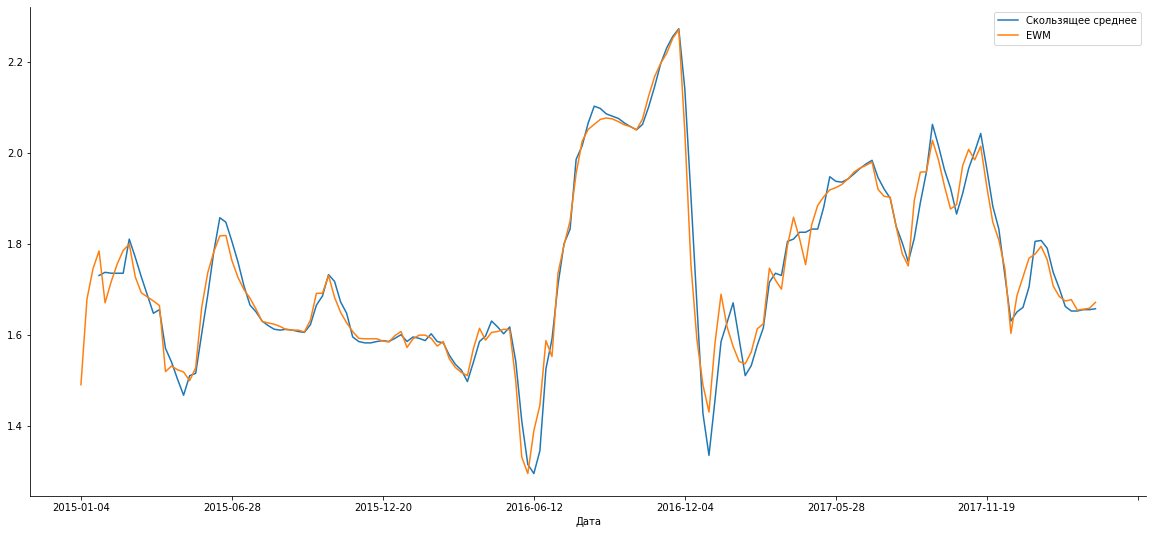

In [122]:
avocado_full_rolling_mean = round(avocado_full \
                                  .query('type=="organic" & region=="Chicago"')['AveragePrice'] \
                                  .rolling(4) \
                                  .mean(),3) \
                                  .plot(figsize=(20,9))

avocado_full_ewm = round(avocado_full \
                         .query('type=="organic" & region=="Chicago"')['AveragePrice'] \
                         .ewm(span=4) \
                         .mean(),3) \
                         .plot()

plt.legend(['Скользящее среднее','EWM'])
plt.xlabel('Дата')
sns.despine();

# Далее будем работать с данными по опозданиям в заключении сделок! 
В файле delays находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали. 
   
Сначала переведём delay в timedelta формат. 
  
Сохраним данные в переменную df, отформатируем колонку нужным способом и переведем её в тип timedelta.  


In [199]:
delays_df = pd.read_csv(r'C:\Users\Сергей\AppData\Local\Programs\Python\Python38-32\Scripts\Karpov\delays.csv')
delays_df

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,-0 days -05:32:08.000000000,602129
260,2384,2364,-3 days -23:27:14.000000000,910660
261,5146,3331,-1 days -15:22:34.000000000,401137
262,7203,5532,-2 days -17:15:02.000000000,308979


# Избавляемся от минусов:

In [222]:
delays_df.delay.str.replace('-','')

0      1 days 14:57:48.000000000
1      4 days 02:14:23.000000000
2      0 days 06:08:57.000000000
3      0 days 23:40:19.000000000
4      1 days 13:21:53.000000000
                 ...            
259    0 days 05:32:08.000000000
260    3 days 23:27:14.000000000
261    1 days 15:22:34.000000000
262    2 days 17:15:02.000000000
263    1 days 15:50:29.000000000
Name: delay, Length: 264, dtype: object

In [223]:
delays_df.delay = delays_df.delay.str.replace('-','')

In [224]:
delays_df

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48.000000000,705436
1,7614,9544,4 days 02:14:23.000000000,859266
2,2052,2427,0 days 06:08:57.000000000,812416
3,9635,8054,0 days 23:40:19.000000000,162312
4,8154,5503,1 days 13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,0 days 05:32:08.000000000,602129
260,2384,2364,3 days 23:27:14.000000000,910660
261,5146,3331,1 days 15:22:34.000000000,401137
262,7203,5532,2 days 17:15:02.000000000,308979


# Переводим в timedelta

In [227]:
delays_df.delay = pd.to_timedelta(delays_df.delay)

In [231]:
delays_df.head(5)

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844


In [229]:
delays_df.dtypes

client_id               int64
company_id              int64
delay         timedelta64[ns]
revenue                 int64
dtype: object

# Время это хорошо, но хотелось бы также разбить его на промежутки.   
Разобьём время на 3 интервала и поместим соответствующие значения в колонку delay_categorical  


In [237]:
pd.cut(delays_df.delay,3)

0      (0 days 00:27:11.587000, 1 days 16:19:58.66666...
1           (3 days 08:05:36.333333333, 4 days 23:51:14]
2      (0 days 00:27:11.587000, 1 days 16:19:58.66666...
3      (0 days 00:27:11.587000, 1 days 16:19:58.66666...
4      (0 days 00:27:11.587000, 1 days 16:19:58.66666...
                             ...                        
259    (0 days 00:27:11.587000, 1 days 16:19:58.66666...
260         (3 days 08:05:36.333333333, 4 days 23:51:14]
261    (0 days 00:27:11.587000, 1 days 16:19:58.66666...
262    (1 days 16:19:58.666666666, 3 days 08:05:36.33...
263    (0 days 00:27:11.587000, 1 days 16:19:58.66666...
Name: delay, Length: 264, dtype: category
Categories (3, interval[timedelta64[ns]]): [(0 days 00:27:11.587000, 1 days 16:19:58.66666... < (1 days 16:19:58.666666666, 3 days 08:05:36.33... < (3 days 08:05:36.333333333, 4 days 23:51:14]]

In [244]:
delays_df['delay_categorical'] = pd.cut(delays_df.delay,bins=3)

In [245]:
delays_df

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
260,2384,2364,3 days 23:27:14,910660,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
261,5146,3331,1 days 15:22:34,401137,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
262,7203,5532,2 days 17:15:02,308979,"(1 days 16:19:58.666666666, 3 days 08:05:36.33..."


# Перезададим колонку delay_categorical, чтобы значения в ней были читаемыми:  
  
'less than 1 day' – время от 0 до 1 дня  
'1-2 days' – от 1 до 2 дней  
'2-3 days' – от 2 до 3 дней  
'more than 3 days' – больше 3 дней  
  

In [287]:
delays_df['delay_categorical'] = pd.cut(delays_df.delay,
                                        bins=[pd.to_timedelta('0d'),
                                              pd.to_timedelta('1d'),
                                              pd.to_timedelta('2d'),
                                              pd.to_timedelta('3d'),
                                              delays_df.delay.max()],
                                        labels=['less than 1 day',
                                                '1-2 days',
                                                '2-3 days',
                                                'more than 3 days'])

In [288]:
delays_df

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,less than 1 day
260,2384,2364,3 days 23:27:14,910660,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1-2 days
262,7203,5532,2 days 17:15:02,308979,2-3 days


# Теперь построим интерактивный барплот с тем, насколько часто задерживаются сделки, выясним самый редкий и самый частый варианты.

In [289]:
delays_categories = delays_df.groupby('delay_categorical',as_index=False) \
                             .agg({'client_id':'count'})
delays_categories

,delay_categorical,client_id
0,less than 1 day,59
1,1-2 days,51
2,2-3 days,47
3,more than 3 days,107


In [292]:
fig = px.bar(delays_categories,
             x='delay_categorical',
             y='client_id',
             title='Частота задержек сделок',
             labels={
                 'delay_categorical':'Вид задержки',
                 'client_id':'Количество'
             },
             color = 'client_id'
             )
fig.show()